In [ ]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
# Load the dataset
df = pd.read_csv("../data/cleaned_european_countries_dataset.csv")

# Quick look at the dataset
df.head()

,country_name,year,month,product,value,yeartodate,previousyeartodate,share,date
0,Austria,2010,1,Hydro,2579.264,39502.566,0.0,0.437055,2010-01-01
1,Austria,2010,1,Solar,2.864,84.421,0.0,0.000485,2010-01-01
2,Austria,2010,1,Geothermal,0.111,1.332,0.0,0.000019,2010-01-01
3,Austria,2010,1,Total combustible fuels,3117.160,26042.221,0.0,0.528201,2010-01-01
4,Austria,2010,1,Coal,693.730,6371.891,0.0,0.117552,2010-01-01


In [3]:
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])
print("Year range:", df['year'].min(), "-", df['year'].max())
print("Countries:", df['country_name'].nunique())
print("Products:", df['product'].nunique())

Rows: 120352
Columns: 9
Year range: 2010 - 2022
Countries: 34
Products: 27


In [4]:
# Define renewable and non-renewable categories
renewables_list = [
    'Hydro', 'Solar', 'Wind', 'Geothermal', 'Other renewables',
    'Other renewables aggregated', 'Combustible renewables', 'Renewables'
]
non_renewables_list = [
    'Coal', 'Oil', 'Natural gas', 'Nuclear', 'Fossil fuels',
    'Total combustible fuels', 'Other combustible non-renewables', 'Non-renewables'
]

# Aggregate yearly totals
renewables_yearly = df[df['product'].isin(renewables_list)].groupby('year')['value'].sum()
non_renewables_yearly = df[df['product'].isin(non_renewables_list)].groupby('year')['value'].sum()

renewables_yearly, non_renewables_yearly

(year
 2010    1.902678e+06
 2011    1.931881e+06
 2012    2.187477e+06
 2013    2.342278e+06
 2014    2.392364e+06
 2015    2.641508e+06
 2016    2.686355e+06
 2017    2.699091e+06
 2018    2.865683e+06
 2019    3.000655e+06
 2020    3.217423e+06
 2021    3.251376e+06
 2022    3.267791e+06
 Name: value, dtype: float64,
 year
 2010    6.713661e+06
 2011    6.633589e+06
 2012    6.410278e+06
 2013    6.163512e+06
 2014    5.925230e+06
 2015    6.365358e+06
 2016    6.457502e+06
 2017    6.620628e+06
 2018    6.411298e+06
 2019    6.262838e+06
 2020    5.814255e+06
 2021    6.082570e+06
 2022    6.060015e+06
 Name: value, dtype: float64)

In [5]:
# Build Linear Regression Models
# Prepare years for training
years = np.array(renewables_yearly.index).reshape(-1, 1)

# Train models
model_renew = LinearRegression()
model_renew.fit(years, renewables_yearly.values)

model_nonrenew = LinearRegression()
model_nonrenew.fit(years, non_renewables_yearly.values)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [10]:
# Make Predictions up to 2030
future_years = np.arange(2010, 2031).reshape(-1, 1)
renew_pred = model_renew.predict(future_years)
nonrenew_pred = model_nonrenew.predict(future_years)

# Calculate renewable share
renew_share_pred = renew_pred / (renew_pred + nonrenew_pred) * 100

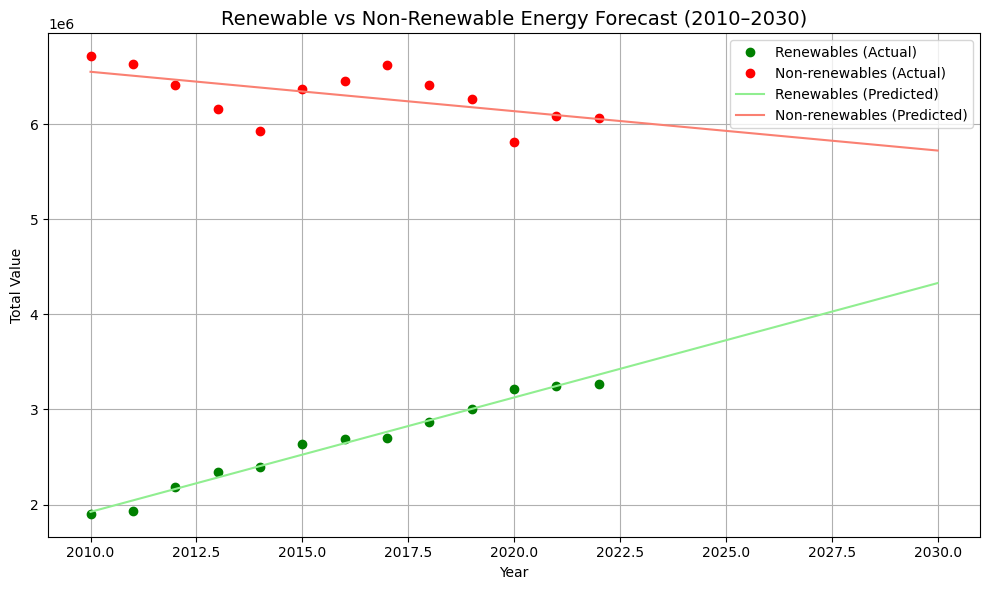

In [7]:
# Plot Historical Data and Predictions
plt.figure(figsize=(10,6))

# Actual data
plt.plot(years, renewables_yearly.values, 'o', label='Renewables (Actual)', color='green')
plt.plot(years, non_renewables_yearly.values, 'o', label='Non-renewables (Actual)', color='red')

# Predictions
plt.plot(future_years, renew_pred, '-', label='Renewables (Predicted)', color='lightgreen')
plt.plot(future_years, nonrenew_pred, '-', label='Non-renewables (Predicted)', color='salmon')

plt.title('Renewable vs Non-Renewable Energy Forecast (2010–2030)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Total Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

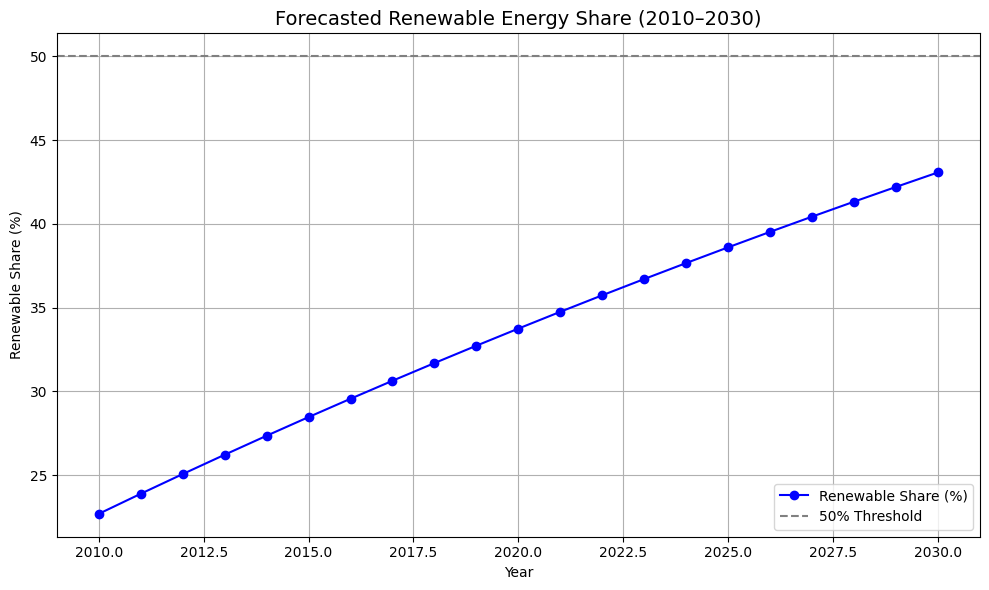

In [11]:
plt.figure(figsize=(10,6))
plt.plot(future_years.flatten(), renew_share_pred, marker='o', color='blue', label='Renewable Share (%)')

plt.axhline(50, color='gray', linestyle='--', label='50% Threshold')
plt.title('Forecasted Renewable Energy Share (2010–2030)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Renewable Share (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [12]:
forecast_df = pd.DataFrame({
    'Year': future_years.flatten(),
    'Renewables_Predicted': renew_pred,
    'NonRenewables_Predicted': nonrenew_pred,
    'Renewable_Share_%': renew_share_pred
})

forecast_df

,Year,Renewables_Predicted,NonRenewables_Predicted,Renewable_Share_%
0,2010,1.923561e+06,6.550024e+06,22.700675
1,2011,2.043821e+06,6.508619e+06,23.897517
2,2012,2.164081e+06,6.467214e+06,25.072490
3,2013,2.284340e+06,6.425810e+06,26.226189
4,2014,2.404600e+06,6.384405e+06,27.359186
5,2015,2.524860e+06,6.343000e+06,28.472034
6,2016,2.645120e+06,6.301595e+06,29.565264
7,2017,2.765380e+06,6.260190e+06,30.639392
8,2018,2.885640e+06,6.218785e+06,31.694913
9,2019,3.005899e+06,6.177381e+06,32.732307


### **Insights:**
- Renewables are projected to **pass the 50% share mark** in the **late 2020s**.
- Non-renewables continue their steady decline.
- By 2030, renewables could hold a **clear majority** of total energy production in Europe.